# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
# For Business Understanding, we are expected to explain to the customers what 
# factors make a car core or less expensive. 
# we are going to breakdown the data provided and learn the details by 
# using different models

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
#load file into dataframe
import pandas as pd
df = pd.read_csv ('data/vehicles.csv')

In [2]:
#check the 
df.head(15)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [3]:
# we are trying to under the datatpe of the dataframe
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [4]:
#Total Row
len(df.index)
#notice that the total row return is 426880

426880

In [6]:
#understand how many different types of unique items per each column
#print(df2['region'].unique())
print(df.region.value_counts())

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64


In [7]:
#understand unique values per each column
df2 = df
#print(df2['id'].unique())  #each row with unique number
#print(df2['region'].unique())  #['prescott' 'fayetteville' 'florida keys' 'worcester / central MA] - many different choices
#print(df2['price'].unique())  
#print(df2['year'].unique())   
print('-------condition--------')
print(df2['condition'].unique())  #[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
print(df2.condition.value_counts())
print('-------cylinders--------')
print(df2['cylinders'].unique())  #[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other', '3 cylinders' '10 cylinders' '12 cylinders']
print(df2.cylinders.value_counts())
print('-------fuel-------------')
print(df2['fuel'].unique()) #[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
print(df2.fuel.value_counts())
print('-------title status---------')
#print(df2['odometer'].unique()) #
print(df2['title_status'].unique()) #[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
print(df2.title_status.value_counts())
print('-------transmission---------')
print(df2['transmission'].unique()) #[nan 'other' 'automatic' 'manual']
print(df2.transmission.value_counts())
print('-------drive---------')
#print(df2['VIN'].unique())
print(df2['drive'].unique()) # [nan 'rwd' '4wd' 'fwd']
print(df2.drive.value_counts())
print('-------size---------')
print(df2['size'].unique())  #[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
print(df2['size'].value_counts())
print('-------type---------')
print(df2['type'].unique())  #[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan', 'offroad' 'bus' 'van' 'convertible' 'wagon']
print(df2.type.value_counts())
print('-------paint_color---------')
print(df2['paint_color'].unique()) #[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow', 'orange' 'green' 'custom' 'purple']
print(df2.paint_color.value_counts())
print('-------state---------')
print(df2['state'].unique())  #['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
                              #'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
                              #'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
                              #'ri' 'sc' 'sd' 'tn' 'ut' 'vt' 'va' 'wv' 'wy']  
print(df2.state.value_counts())

-------condition--------
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64
-------cylinders--------
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64
-------fuel-------------
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64
-------title status---------
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: t

In [8]:
#find out max,min and mean values for column where can't be grouped
print('------price--------')
print(df2['price'].unique())
print("max ",df.price.max())
print("min ",df.price.min())
print("mean ",df.price.mean())
print('------year--------')
#print(df2['year'].unique())
print("max ",df.year.max())
print("min ",df.year.min())
print("mean ",df.year.mean())
print('------odometer--------')
#print(df2['year'].unique())
print("max ",df.odometer.max())
print("min ",df.odometer.min())
print("mean ",df.odometer.mean())


------price--------
[ 6000 11900 21000 ...  6328 19853 17873]
max  3736928711
min  0
mean  75199.0331873126
------year--------
max  2022.0
min  1900.0
mean  2011.23519116697
------odometer--------
max  10000000.0
min  0.0
mean  98043.33144290854


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [9]:
#check null value per each column
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [10]:
#show the null percentage per each column
pernull = df.isnull().sum() * 100 / len(df)
dfNull = pd.DataFrame({'Column Name': df.columns, 'Percent with NULL Value': pernull})
dfNull

,Column Name,Percent with NULL Value
id,id,0.000000
region,region,0.000000
price,price,0.000000
year,year,0.282281
manufacturer,manufacturer,4.133714
model,model,1.236179
condition,condition,40.785232
cylinders,cylinders,41.622470
fuel,fuel,0.705819
odometer,odometer,1.030735


In [40]:
df2 = df
#remove NaN from column year and odomoter
df2 = df2[df2['year'].notna()]
df2 = df2[df2['odometer'].notna()]

In [41]:
#Total Row
len(df2.index)

421344

In [123]:
# remove price below 1000
df2 = df2.drop(df5[df5.price <= 1000].index)

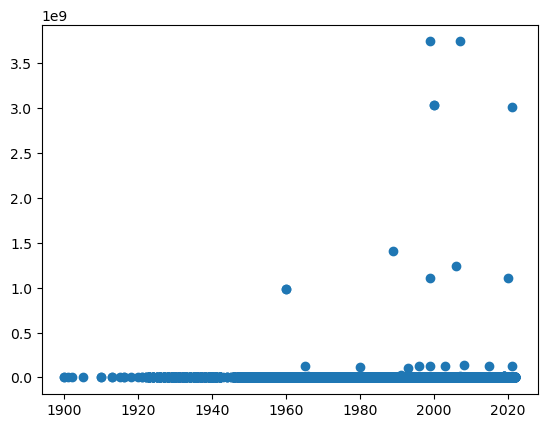

In [124]:
#we want to see the distribution between year and price
import matplotlib.pyplot as plt
plt.scatter(df2['year'], df2['price']);
plt.show()

In [125]:
# we will drop the proce over 200000, as they are only few points are above these values
df3 = df2
df3 = df3.drop(df3[df3.price > 200000].index)

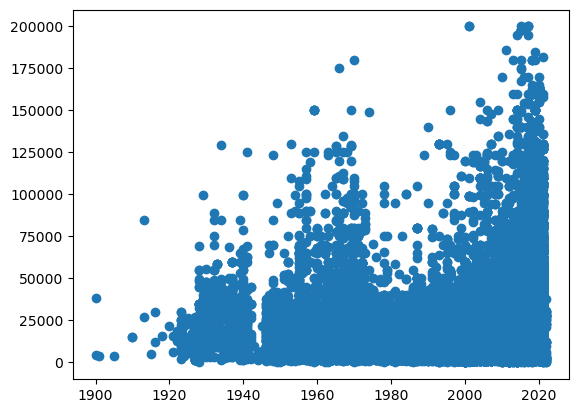

In [126]:
#we want to see the distribution between year and price
import matplotlib.pyplot as plt
plt.scatter(df3['year'], df3['price']);
plt.show()

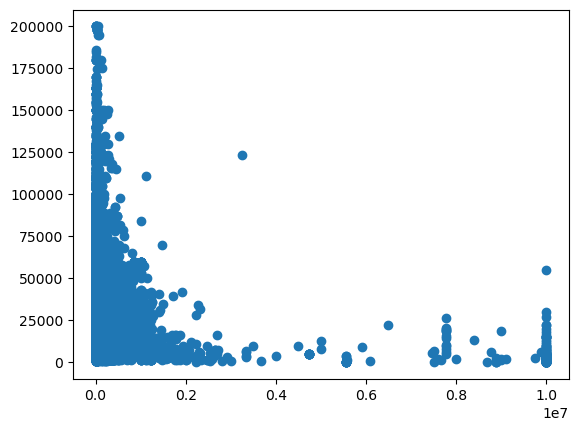

In [127]:
#we want to see the relationship between odometer and price
plt.scatter(df3['odometer'], df3['price']);
plt.show()


In [128]:
#we try to remove odometer over 2000000 to prevent overfitting
df4 = df3
df4 = df4.drop(df4[df4.odometer >2000000].index)


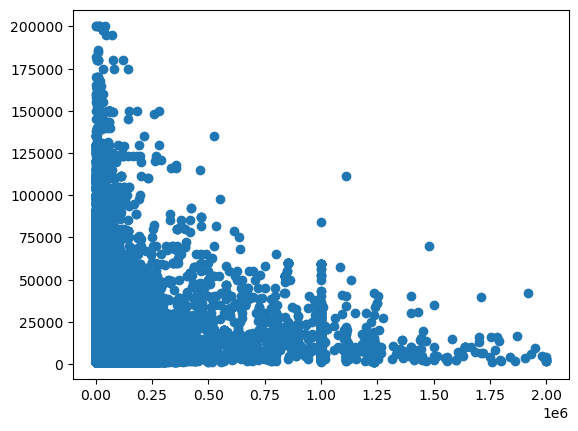

In [129]:

plt.scatter(df4['odometer'], df4['price']);
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_absolute_error
#model 1 is to use odometer to predict price
df5 = df4
X1a = df5[['odometer']]
y1a = df5['price']
X_train1a, X_test1a, y_train1a, y_test1a = '', '', '', ''
X_train1a, X_test1a, y_train1a, y_test1a = train_test_split(X1a, y1a, test_size=0.3, random_state=22)
reg = LinearRegression()

model1a = reg.fit(X_train1a, y_train1a)
print("Coef for model 1:",model1a.coef_)

y_model1a_trained = model1a.predict(X_train1a)
#print("Example:", y_model1_predicted)
mse1a_trained = mean_squared_error(y_train1a, y_model1a_trained)
mae1a_trained = mean_absolute_error(y_train1a, y_model1a_trained)
print("mse trained :",mse1a_trained)
print("mae trained:", mae1a_trained)

#y_model1a_predicted = model1a.predict(X_test1a)
#print("Example:", y_model1_predicted)
#mse1a = mean_squared_error(y_test1a, y_model1a_predicted)
#mae1a = mean_absolute_error(y_test1a, y_model1a_predicted)
#print("mse :",mse1a)
#print("mae :", mae1a)
y_model1a_predicted = model1a.predict(X_test1a)
mse1a_predicted = mean_squared_error(y_test1a, y_model1a_predicted)
mae1a_predicted = mean_absolute_error(y_test1a, y_model1a_predicted)
print("mse predicted :",mse1a_predicted)
print("mae predicted:", mae1a_predicted)


Coef for model 1: [-0.08073127]
mse trained : 181761020.67553136
mae trained: 9734.589873118697
mse predicted : 178841691.89987087
mae predicted: 9693.336248562618


In [212]:
#we show odometer, price and prediction
result = X_train1a
result['price'] = y_train1a
result['prediction'] = y_model1a_trained.tolist()
result.head(15)

,odometer,price,prediction
87142,80400.0,4995,20717.367315
208901,62500.0,11500,22162.457114
20358,16441.0,21589,25880.858847
36960,122810.0,12499,17293.553999
67305,83280.0,17498,20484.861247
242806,73160.0,27990,21301.861736
208110,260000.0,3200,6218.030566
192882,58400.0,28999,22493.455336
415468,93899.0,16980,19627.575852
57967,87436.0,29900,20149.342074


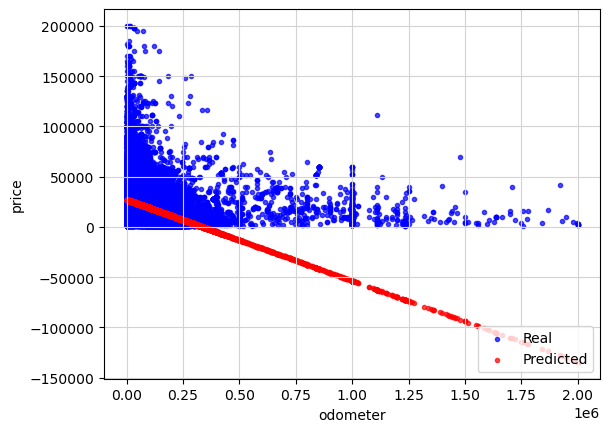

In [213]:
# Build scatterplot for model 1
x_axis = X_train1a.odometer
# Build scatterplot

plt.scatter(x_axis, y_train1a, c = 'b', alpha = 0.7, marker = '.', label = 'Real')
plt.scatter(x_axis, y_model1a_trained.tolist(), c = 'r', alpha = 0.7, marker = '.', label = 'Predicted')

plt.xlabel('odometer')
plt.ylabel('price')

plt.grid(color = '#D3D3D3', linestyle = 'solid')

plt.legend(loc = 'lower right')

In [240]:
#model 1b , we use odometer and odometer^2 to predict price
df5b = df4
df5b['odometer2'] = df5b['odometer']**2
X1b = df5b[['odometer','odometer2']]
y1b = df5b['price']
X_train1b, X_test1b, y_train1b, y_test1b = '', '', '', ''
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X1b, y1b, test_size=0.3, random_state=22)


reg = LinearRegression()

model1b = reg.fit(X_train1b, y_train1b)
print("Coef for model 1:",model1b.coef_)

y_model1b_trained = model1b.predict(X_train1b)
#print("Example:", y_model1_predicted)
mse1b_trained = mean_squared_error(y_train1b, y_model1b_trained)
mae1b_trained = mean_absolute_error(y_train1b, y_model1b_trained)
print("mse :",mse1b_trained)
print("mae :", mae1b_trained)

y_model1b_predicted = model1b
.predict(X_test1b)
mse1b_predicted = mean_squared_error(y_test1b, y_model1b_predicted)
mae1b_predicted = mean_absolute_error(y_test1b, y_model1b_predicted)
print("mse predicted :",mse1b_predicted)
print("mae predicted:", mae1b_predicted)

Coef for model 1: [-1.39507673e-01  1.02677273e-07]
mse : 163330937.31015983
mae : 9113.91737226884
mse predicted : 160625708.79121482
mae predicted: 9070.273705052725


In [215]:
result = X_train1b
result['price'] = y_train1b
result['prediction'] = y_model1b_trained.tolist()
result.head(15)

,odometer,odometer2,price,prediction
87142,80400.0,6.464160e+09,4995,20682.608207
208901,62500.0,3.906250e+09,11500,22917.156335
20358,16441.0,2.703065e+08,21589,28969.411493
36960,122810.0,1.508230e+10,12499,15650.974495
67305,83280.0,6.935558e+09,17498,20329.228010
242806,73160.0,5.352386e+09,27990,21578.489798
208110,260000.0,6.760000e+10,3200,1904.291408
192882,58400.0,3.410560e+09,28999,23438.241698
415468,93899.0,8.817022e+09,16980,19040.979599
57967,87436.0,7.645054e+09,29900,19822.283203


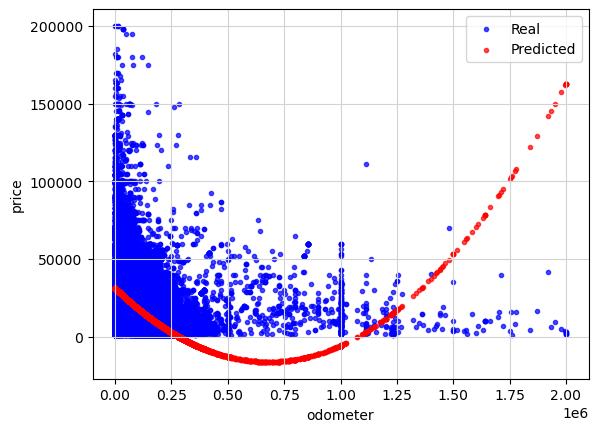

In [216]:
#scatterplot for model 1b
x_axis = X_train1b.odometer

# Build scatterplot for model 1b

plt.scatter(X_train1b.odometer, y_train1b, c = 'b', alpha = 0.7, marker = '.', label = 'Real')
#plt.scatter(X_test1b.odometer2, y_test1b, c = 'b', alpha = 0.7, marker = '.', label = 'Real')

plt.scatter(x_axis, y_model1b_trained.tolist(), c = 'r', alpha = 0.7, marker = '.', label = 'Predicted')

plt.xlabel('odometer')
plt.ylabel('price')

plt.grid(color = '#D3D3D3', linestyle = 'solid')

plt.legend(loc = 'upper right')

In [242]:
#build model 2a use year to predict price
df6a = df4
X2a = df6a[['year']]
y2a = df6a['price']
X_train2a, X_test2a, y_train2a, y_test2a = '', '', '', ''
X_train2a, X_test2a, y_train2a, y_test2a = train_test_split(X2a, y2a, test_size=0.3, random_state=22)


reg = LinearRegression()

model2a = reg.fit(X_train2a, y_train2a)
print("Coef for model 1:",model2a.coef_)

y_model2a_trained = model2a.predict(X_train2a)
#print("Example:", y_model1_predicted)
mse2a_trained = mean_squared_error(y_train2a, y_model2a_trained)
mae2a_trained = mean_absolute_error(y_train2a, y_model2a_trained)
print("mse trained :",mse2a_trained)
print("mae trained :", mae2a_trained)

y_model2a_predicted = model2a.predict(X_test2a)
mse2a_predicted = mean_squared_error(y_test2a, y_model2a_predicted)
mae2a_predicted = mean_absolute_error(y_test2a, y_model2a_predicted)
print("mse predicted :",mse2a_predicted)
print("mae predicted:", mae2a_predicted)

Coef for model 1: [547.75385121]
mse trained : 194275517.3921882
mae trained : 10445.225614267538
mse predicted : 192467842.16627672
mae predicted: 10438.111947369827


In [218]:
result = X_train2a
result['price'] = y_train2a
result['prediction'] = y_model2a_trained.tolist()
result.head(15)

,year,price,prediction
87142,2014.0,4995,21174.676503
208901,2016.0,11500,22270.184205
20358,2020.0,21589,24461.199610
36960,2014.0,12499,21174.676503
67305,2014.0,17498,21174.676503
242806,2013.0,27990,20626.922651
208110,1998.0,3200,12410.614883
192882,2016.0,28999,22270.184205
415468,2015.0,16980,21722.430354
57967,2015.0,29900,21722.430354


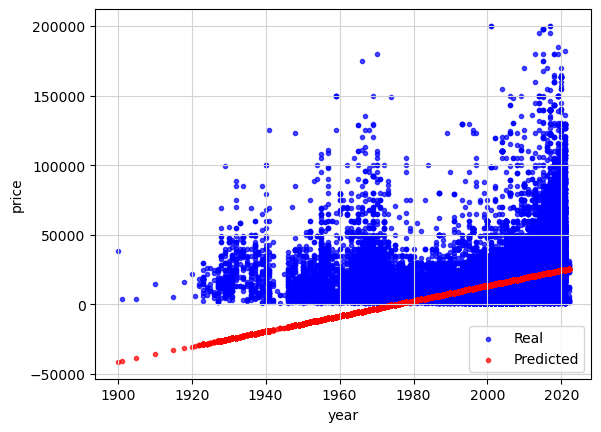

In [219]:
# Define x axis


# Build scatterplot for model 2a

plt.scatter(X_train2a.year, y_train2a, c = 'b', alpha = 0.7, marker = '.', label = 'Real')


plt.scatter(X_train2a.year, y_model2a_trained.tolist(), c = 'r', alpha = 0.7, marker = '.', label = 'Predicted')

plt.xlabel('year')
plt.ylabel('price')

plt.grid(color = '#D3D3D3', linestyle = 'solid')

plt.legend(loc = 'lower right')

In [243]:
#build model 2b use year, year^2 to predict price of cars
df6b = df4

df6b['year2'] = df6b['year']**2
X2b = df6b[['year','year2']]
y2b = df6b['price']
X_train2b, X_test2b, y_train2b, y_test2b = '', '', '', ''
X_train2b, X_test2b, y_train2b, y_test2b = train_test_split(X2b, y2b, test_size=0.3, random_state=22)


reg = LinearRegression()

model2b = reg.fit(X_train2b, y_train2b)
print("Coef:",model2b.coef_)

y_model2b_trained = model2b.predict(X_train2b)
#print("Example:", y_model1_predicted)
mse2b_trained = mean_squared_error(y_train2b, y_model2b_trained)
mae2b_trained = mean_absolute_error(y_train2b, y_model2b_trained)
print("mse :",mse2b_trained)
print("mae :", mae2b_trained)

y_model2b_predicted = model2b.predict(X_test2b)
mse2b_predicted = mean_squared_error(y_test2b, y_model2b_predicted)
mae2b_predicted = mean_absolute_error(y_test2b, y_model2b_predicted)
print("mse predicted :",mse2b_predicted)
print("mae predicted:", mae2b_predicted)

Coef: [-9.83150244e+04  2.47843005e+01]
mse : 152575865.20989534
mae : 8789.735314580006
mse predicted : 151352983.77426383
mae predicted: 8784.982624251272


In [221]:
result = X_train2b
result['price'] = y_train2b
result['prediction'] = y_model2b_trained.tolist()
result.head(15)

,year,year2,price,prediction
87142,2014.0,4056196.0,4995,21582.074243
208901,2016.0,4064256.0,11500,24713.487809
20358,2020.0,4080400.0,21589,31571.138155
36960,2014.0,4056196.0,12499,21582.074243
67305,2014.0,4056196.0,17498,21582.074243
242806,2013.0,4052169.0,27990,20090.720361
208110,1998.0,3992004.0,3200,3668.644263
192882,2016.0,4064256.0,28999,24713.487809
415468,2015.0,4060225.0,16980,23122.996725
57967,2015.0,4060225.0,29900,23122.996725


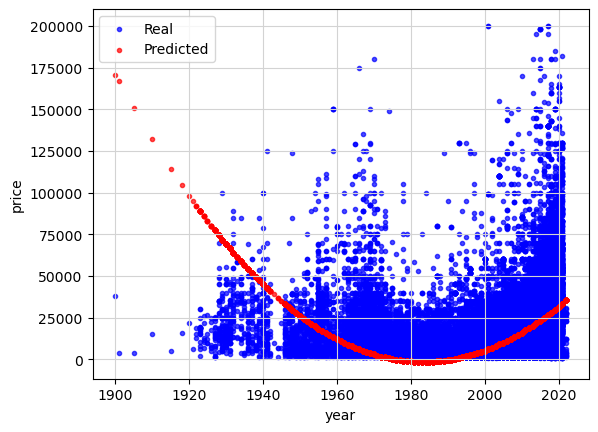

In [222]:
# Define x axis


# Build scatterplot for model 2b

plt.scatter(X_train2b.year, y_train2b, c = 'b', alpha = 0.7, marker = '.', label = 'Real')
#plt.scatter(X_test1b.odometer2, y_test1b, c = 'b', alpha = 0.7, marker = '.', label = 'Real')

plt.scatter( X_train2b.year, y_model2b_trained.tolist(), c = 'r', alpha = 0.7, marker = '.', label = 'Predicted')

plt.xlabel('year')
plt.ylabel('price')

plt.grid(color = '#D3D3D3', linestyle = 'solid')

plt.legend(loc = 'upper left')

In [223]:
#use One Hot Encoder to handle column fuel
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset
df7a = df4

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df7a[['fuel']])
print(transformed.toarray())
print(ohe.categories_)
df7a[ohe.categories_[0]] = transformed.toarray()
#df5.drop(columns=NaN)
df7a.head()

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[array(['diesel', 'electric', 'gas', 'hybrid', 'other', nan], dtype=object)]


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,paint_color,state,odometer2,year2,diesel,electric,gas,hybrid,other,NaN
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,white,al,3.355074e+09,4056196.0,0.0,0.0,1.0,0.0,0.0,0.0
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,blue,al,5.073570e+09,4040100.0,0.0,0.0,1.0,0.0,0.0,0.0
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,red,al,3.671056e+08,4080400.0,0.0,0.0,1.0,0.0,0.0,0.0
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,red,al,1.691183e+09,4068289.0,0.0,0.0,1.0,0.0,0.0,0.0
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,black,al,1.638400e+10,4052169.0,0.0,0.0,1.0,0.0,0.0,0.0


In [245]:

#build model 3a 
X3a = df7a[['year','odometer','year2','odometer2','diesel','electric','gas','hybrid','other']]
y3a = df7a['price']

X_train3a, X_test3a, y_train3a, y_test3a = '', '', '', ''
X_train3a, X_test3a, y_train3a, y_test3a = train_test_split(X3a, y3a, test_size=0.3, random_state=22)

reg = LinearRegression()
model3a = reg.fit(X_train3a, y_train3a)
print("Coef",model3a.coef_)
y_model3a_trained = model3a.predict(X_train3a)
#print("Example:", y_model3a_trained)
mse3a_trained = mean_squared_error(y_train3a, y_model3a_trained)
mae3a_trained = mean_absolute_error(y_train3a, y_model3a_trained)
print("mse trained :",mse3a_trained)
print("mae trained :", mae3a_trained)

y_model3a_predicted = model3a.predict(X_test3a)
mse3a_predicted = mean_squared_error(y_test3a, y_model3a_predicted)
mae3a_predicted = mean_absolute_error(y_test3a, y_model3a_predicted)
print("mse predicted :",mse3a_predicted)
print("mae predicted:", mae3a_predicted)

Coef [-6.22570561e+04 -9.01547645e-02  1.57029634e+01  6.42775748e-08
  1.97996446e+04  8.75630692e+02  6.39537391e+01 -3.60521449e+03
  4.22748238e+03]
mse trained : 115747470.40197483
mae trained : 7428.858657324505
mse predicted : 112969141.27591893
mae predicted: 7388.185724694944


In [225]:
result = X_train3a
result['price'] = y_train3a
result['prediction'] = y_model3a_trained.tolist()
result.head(15)

,year,odometer,year2,odometer2,diesel,electric,gas,hybrid,other,price,prediction
87142,2014.0,80400.0,4056196.0,6.464160e+09,0.0,0.0,1.0,0.0,0.0,4995,20087.997243
208901,2016.0,62500.0,4064256.0,3.906250e+09,0.0,0.0,1.0,0.0,0.0,11500,23589.124514
20358,2020.0,16441.0,4080400.0,2.703065e+08,0.0,0.0,1.0,0.0,0.0,21589,31988.270779
36960,2014.0,122810.0,4056196.0,1.508230e+10,0.0,0.0,1.0,0.0,0.0,12499,16818.486567
67305,2014.0,83280.0,4056196.0,6.935558e+09,0.0,0.0,1.0,0.0,0.0,17498,19858.651867
242806,2013.0,73160.0,4052169.0,5.352386e+09,0.0,0.0,1.0,0.0,0.0,27990,19690.477847
208110,1998.0,260000.0,3992004.0,6.760000e+10,0.0,0.0,1.0,0.0,0.0,3200,-4065.867366
192882,2016.0,58400.0,4064256.0,3.410560e+09,0.0,0.0,1.0,0.0,0.0,28999,23926.897297
415468,2015.0,93899.0,4060225.0,8.817022e+09,0.0,0.0,1.0,0.0,0.0,16980,20032.418008
57967,2015.0,87436.0,4060225.0,7.645054e+09,1.0,0.0,0.0,0.0,0.0,29900,40275.447858


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [246]:
# Model 1a
print("mae trained:", mae1a_trained)
print("mae predicted:", mae1a_predicted)

mae trained: 9734.589873118697
mae predicted: 9693.336248562618


In [249]:
# Model 1b
print("mae trained:", mae1b_trained)
print("mae predicted:", mae1b_predicted)


mae trained: 9113.91737226884
mae predicted: 9070.273705052725


In [250]:
# Model 2a
print("mae trained:", mae2a_trained)
print("mae predicted:", mae2a_predicted)


mae trained: 10445.225614267538
mae predicted: 10438.111947369827


In [251]:
# Model 2b
print("mae trained :", mae2b_trained)
print("mae predicted :", mae2b_predicted)


mae trained : 8789.735314580006
mae predicted : 8784.982624251272


In [252]:
#Model 3a
print("mae trained :", mae3a_trained)
print("mae predicted :", mae3a_predicted)

mae trained : 7428.858657324505
mae predicted : 7388.185724694944


In [232]:
# 5 Models were formed in previous sections, we are using the trained data for each model to calculate 
# the MSE (Mean Squared Error) and MAE (Mean Absolute Error) of these models, 
# Model 3a has the lowest mse and mae among all these 5 models, 
# model 3a has the best performance to predict the price of used cars
# The Model description can be found from below
# Model 1 use odometer to predict car sales price
# Model 2 use odometer and odometer^2 to predict car sales price
# Model 3 use year to predict car sales price
# Model 4 use year and year^2 to predict car sales parice
# Model 5 use odometer, odometer2, year, year2, diesel, electric, gas, hybrid, other to predict the car price, 
# OneHotEncoder is used for original column fuel, 
# we also do a comparison of mae trained and mae predicted per model, 
# there is no different between them




### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [253]:
# Among all 5 models, we found that model 3a is best to explain the relationship
# between car price and year,year^2, odometer,odometer^2, diesel, electric, gas, hybrid
X3a = df7a[['year','odometer','year2','odometer2','diesel','electric','gas','hybrid','other']]
y3a = df7a['price']

X_train3a, X_test3a, y_train3a, y_test3a = '', '', '', ''
X_train3a, X_test3a, y_train3a, y_test3a = train_test_split(X3a, y3a, test_size=0.3, random_state=22)

reg = LinearRegression()
model3a = reg.fit(X_train3a, y_train3a)

y_model3a_predicted = model3a.predict(X_test3a)
print("predicted:", y_model3a_predicted)


predicted: [14585.12156944 17442.70552483  6003.68561777 ... 10538.16133773
 29499.63999552 18418.57021607]


In [256]:
result = X_test3a
result['price'] = y_test3a
result['prediction'] = y_model3a_predicted.tolist()
result.head(15)

,year,odometer,year2,odometer2,diesel,electric,gas,hybrid,other,price,prediction
248909,2009.0,92074.0,4036081.0,8.477621e+09,0.0,0.0,1.0,0.0,0.0,6999,14585.121569
410258,2011.0,77939.0,4044121.0,6.074488e+09,0.0,0.0,1.0,0.0,0.0,12999,17442.705525
304497,2003.0,147200.0,4012009.0,2.166784e+10,0.0,0.0,1.0,0.0,0.0,1200,6003.685618
250457,2007.0,137223.0,4028049.0,1.883015e+10,0.0,0.0,1.0,0.0,0.0,3800,9568.069382
223341,2020.0,8157.0,4080400.0,6.653665e+07,0.0,0.0,1.0,0.0,0.0,43990,32722.015018
73996,2010.0,134812.0,4040100.0,1.817428e+10,0.0,0.0,1.0,0.0,0.0,12995,12208.518658
157496,1965.0,100000.0,3861225.0,1.000000e+10,0.0,0.0,1.0,0.0,0.0,7900,7521.500416
164004,2019.0,31066.0,4076361.0,9.650964e+08,1.0,0.0,0.0,0.0,0.0,46999,49282.894342
394567,2010.0,131081.0,4040100.0,1.718223e+10,0.0,0.0,1.0,0.0,0.0,8250,12481.119723
24586,2011.0,48854.0,4044121.0,2.386713e+09,0.0,0.0,1.0,0.0,0.0,17985,19827.815656
